# Orbital Paramters and Frames
## Given:
Spacecraft in the Earth moon frame with $a = 10 R_{Earth}$, $\Omega = 45^o$, $e = 0.4$, $\omega = -90^o$, $i = 30^o$, $\theta^* = 135^o$

## Find:
a) Determine the orbital paramters $\bar{r}$, $\bar{v}$, $r$, $v$, $\gamma$, $\theta$, $E$, $M$, $(t-t_p)$

b) Plot

In [1]:
# Import Functions and basic info
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Functions.Universe import G

In [2]:
miu = SS.loc['Earth', 'miu']

a = 10 * SS.loc['Earth', 'r']
e = 0.4
omega = kp.angle.degree(-90)
Omega = kp.angle.degree(45)
i     = kp.angle.degree(30)
thst  = kp.angle.degree(135) 


### Part a)

In [6]:
p = kp.p_a_e(a, e)
h = kp.h_miu_p(miu, p)
n = kp.n_miu_a(miu, a)
r = kp.distance.keplar_r(p, e, thst.rad, i=i.rad, omega=omega.rad, Omega=Omega.rad)
v_mag = kp.velocity.v_a_miu_r(a, miu, r.mag)
gamma = kp.gamma.gamma_h_r_v_thst(h, r.mag, v_mag, thst.rad)
v = kp.velocity.v_gamma(v_mag, gamma.rad, thst.rad)

theta = thst + omega 

E = kp.E.E_thst(thst.rad, e)
M = kp.M.M_E_e(E.rad, e)

t_tp_s =  M.rad / n
t_tp_h = t_tp_s/3600

### Part b)

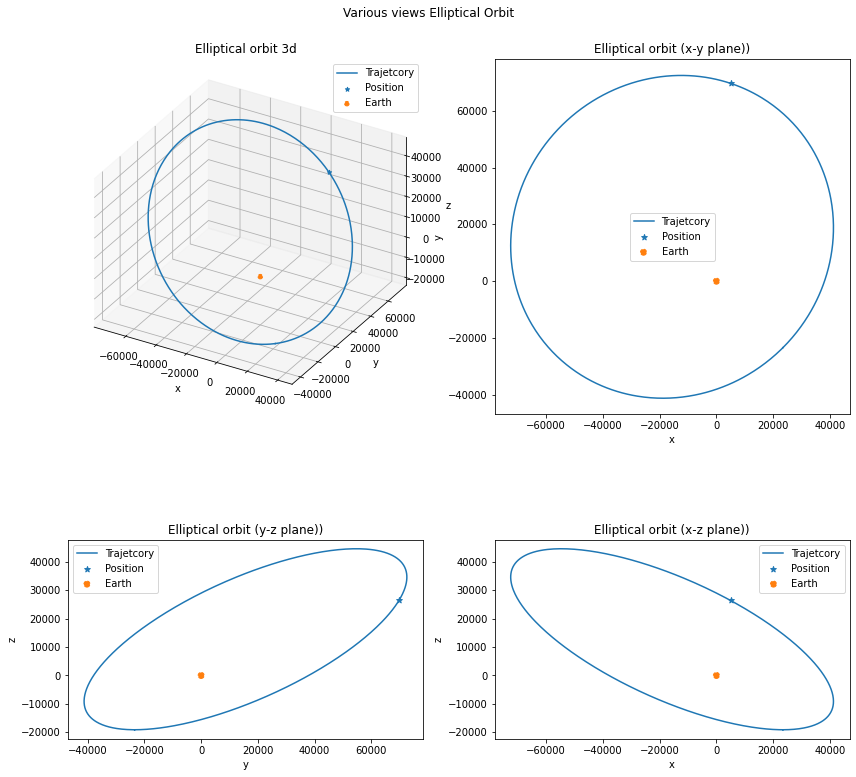

In [7]:
thst_traj = kp.angle.degree(np.linspace(0, 360, 500))
r_traj = kp.distance.keplar_r(p, e, thst_traj.rad, i=i.rad, omega=omega.rad, Omega=Omega.rad)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_proj_type('ortho')
ax1.plot(r_traj.eci[:,0], r_traj.eci[:,1], r_traj.eci[:,2], label='Trajetcory')
ax1.scatter(r.eci[0], r.eci[1], r.eci[2], label='Position', marker='*')
ax1.scatter(0, 0, 0, ls = '--', label='Earth')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Elliptical orbit 3d')
ax1.legend()

ax2.plot(r_traj.eci[:,0], r_traj.eci[:,1], label='Trajetcory')
ax2.scatter(r.eci[0], r.eci[1], label='Position', marker='*')
ax2.scatter(0, 0, ls = '--', label='Earth')
ax2.set_aspect('equal', 'box')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Elliptical orbit (x-y plane))')
ax2.legend()

ax3.plot(r_traj.eci[:,1], r_traj.eci[:,2], label='Trajetcory')
ax3.scatter(r.eci[1], r.eci[2], label='Position', marker='*')
ax3.scatter(0, 0, ls = '--', label='Earth')
ax3.set_aspect('equal', 'box')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('Elliptical orbit (y-z plane))')
ax3.legend()

ax4.plot(r_traj.eci[:,0], r_traj.eci[:,2], label='Trajetcory')
ax4.scatter(r.eci[0], r.eci[2], label='Position', marker='*')
ax4.scatter(0, 0, ls = '--', label='Earth')
ax4.set_aspect('equal', 'box')
ax4.set_xlabel('x')
ax4.set_ylabel('z')
ax4.set_title('Elliptical orbit (x-z plane))')
ax4.legend()

fig.suptitle('Various views Elliptical Orbit')
fig.tight_layout()
fig.subplots_adjust(top=0.95)